#  연속형 확률변수

##  1차원 연속형 확률변수

- 확률밀도함수(probability density function, PDF) : 구간으로 정의함. 밀도함수. f(x)

작게 쪼개면 무한정 쪼개질 수 있기 떄문에 정확하게 f(x) = P(X=x)는 '되지 않는다'.

 - 연속형 확률변수
 
이산형 확률변수와 연속형 확률변수의 주된 차이는 확률변수가 취할 수 있는 값이 이산적인가 연속적인가이다. 연속형 확률변수의 경우 계산 과정에 적분이 포함된다. 적분은 SciPy의 integral 모듈을 사용하여 구현함

확률질량함수 PMF : 이산형 확률변수(p.115)

확률밀도함수 PDF : 연속형 확률변수(p.173)

In [49]:
import numpy as np
import matplotlib.pyplot as plt

x_range = np.array([0,1])

In [50]:
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else :
        return 0

In [51]:
X = [x_range, f]

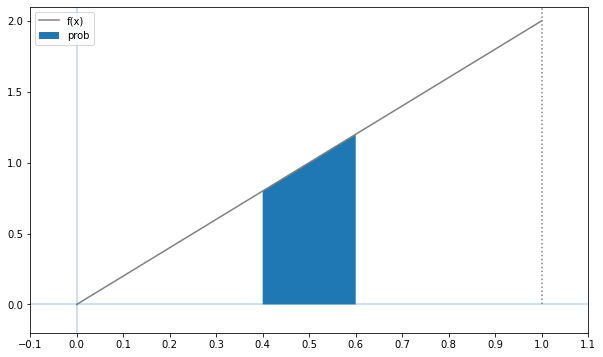

In [52]:
# 불골정한 룰렛에 대한 밀도함수와 확률
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
ax.hlines(0, -0.2, 1.2, alpha=0.3)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

# 0.4부터 0.6까지 x좌표를 준비
xs = np.linspace(0.4, 0.6, 100)
# xs의 범위로 f(x)와 x축으로 둘러싸인 영역에 색을 적용
ax.fill_between(xs, [f(x) for x in xs], label='prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()

<img src = '정적분.jpg' STYLE='width 100px;'>

In [53]:
# 둘러싸인 면적 구하기
# 사다리꼴도 가능하지만, 적분으로 구할 수도 있음. integrate의 quad 함수 사용
# quad함수는 적분값과 추정오차 반환
from scipy import integrate # 적분

integrate.quad(f, 0.4, 0.6) # (피적분함수, 적분범위1, 적분범위2)

(0.200, 0.000)

In [54]:
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)
# 함수의 최솟값은 fun이라는 인스턴스 변수에
res.fun # 확률의 최소는 0임

0

In [55]:
integrate.quad(f, -np.inf, np.inf)[0] # 확률의 총합은 1임. 두번째인수[1]는 추정오차니깐 지금 안봄

1.000

- 누적분포함수 p.179

In [56]:
def F(x):
    return integrate.quad(f, -np.inf, x)[0]

In [57]:
F(0.6) - F(0.4)

0.200

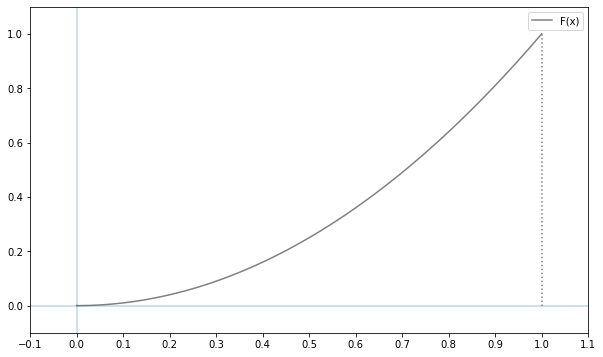

In [58]:
# (누적)분포함수
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray')
ax.hlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(xs.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show() # 분포함수는 반드시 단조증가함수(x가 증가할때 y는 감소하지 않는 함수)가 됨

- 확률변수의 변환

확률변수 X에 대해 Y = 2X+3이면, Y도 확률변수

In [59]:
y_range = [3,5]

def g(y): # 밀도함수
    if y_range[0] <= y <= y_range[1]:
        return (y-3) / 2
    else :
        return 0
    
def G(y): # 분포함수
    return integrate.quad(g, -np.inf, y)[0]

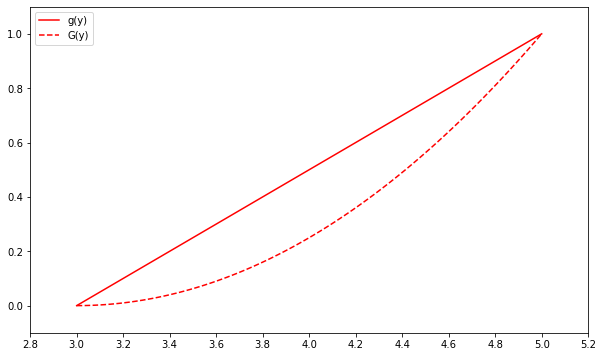

In [60]:
# 밀도함수와 분포함수 같이 그리기
ys = np.linspace(y_range[0], y_range[1], 100)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(ys, [g(y) for y in ys], label='g(y)', color='red')
ax.plot(ys, [G(y) for y in ys], label='G(y)', ls='--', color='red')

ax.set_xticks(np.arange(2.8, 5.2, 0.2))
ax.set_xlim(2.8, 5.2)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

###  1차원 연속형 확률변수의 지표

- 확률변수 X의 기댓값 : E(X). 연속형 확률변수 X의 평균이기도함.  기댓값=평균

In [61]:
# 불공정한 룰렛의 기댓값 p.183
def integrand(x): # 적분
    return x * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.667

In [62]:
def E(X, g=lambda x: x): # 기댓값
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [63]:
E(X)

0.667

In [64]:
# Y = 2X+3 기댓값 계산
E(X, g=lambda x: 2*x + 3)

4.333

In [65]:
2 * E(X) + 3

4.333

- 불공정한 룰렛의 분산

In [66]:
mean = E(X)
def integrand(x):
    return (x - mean)**2 * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

In [67]:
# 인수 g가 확률변수에 대한 변환의 함수
def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean)**2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [68]:
V(X)

0.056

In [69]:
V(X, lambda x: 2*x + 3)

0.222

In [70]:
2**2 * V(X)

0.222

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import warnings
# warnings.filterwarnings('ignore', category=integrate.IntegrationWarning)
warnings.filterwarnings('ignore')

%precision 3

'%.3f'

미적분 관계

- 총효용(토탈유틸리티)과 한계효용(마지널유틸리티)간의 관계를 미적분으로 설명할 수 있다.
- 총효용곡선의 특정 x에 대한 y값은 한계효용곡선의 하방면적과 같고 한계효용곡선의 특정 x에 대한 y값은 총효용곡선의 x에서의 기울기와 같다.

<img src = '미적분관계1.jpg' STYLE='width 100px;'>
<img src = '미적분관계3.jpg' STYLE='width 100px;'>

- 기울기를 구하려면 도함수(미분된 식)의 하방면적을 구하면됨(이거 하방면적이 아니라 y값 아닌지? 체크하기)
- 도함수 적분할 때 상수항은 무시해도됨(기울기에 대한 좌표만 보기때문)

- 미분은 기울기(>>순간변화율), 적분은 넓이를 구하는 것.
- 적분된 식에서 면적(넓이)은 원래 식에서의 y값 
- 미분하면 차수가 내려가고, 적분하면 차수가 올라감

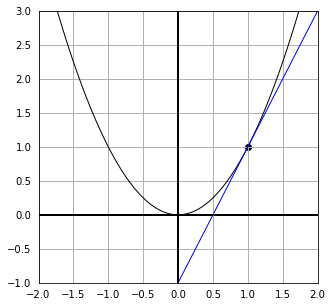

In [72]:
def f(x):
    return(x**2)
def g(x):
    return(2*x -1)

# x가 1일때의 접선의 방정식 2x -1, 기울기는 1
x = np.linspace(-3, 3, 100)
fig = plt.figure(figsize=(5,5))
plt.scatter([1],[1],c='k')
plt.plot(x, f(x), 'b-', lw=1, c='k')
plt.plot(x, g(x), 'b-', lw=1, c='b')
plt.plot([x.min(), x.max()], [0, 0], lw=2, c='k')
plt.plot([0, 0], [g(x).min(), f(x).max()], lw=2, c='k')
plt.ylim(-1, 3)
plt.xlim(-2, 2)
plt.grid(lw=1)
# plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(color='white')
plt.show()


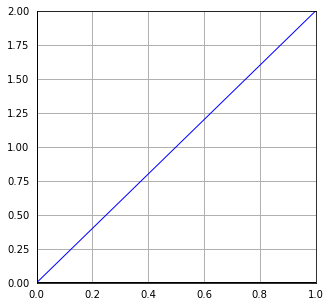

In [73]:
def g(x):
    return(2*x) 

x = np.linspace(-3, 3, 100)
fig = plt.figure(figsize=(5,5))
plt.plot(x, g(x), 'b-', lw=1, c='b')
plt.plot([x.min(), x.max()], [0, 0], lw=2, c='k')
plt.plot([0, 0], [g(x).min(), f(x).max()], lw=2, c='k')
plt.ylim(0, 2)
plt.xlim(0, 1)
plt.grid(lw=1)
# plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(color='white')
plt.show() # 한계효용곡선

1차원 연속형 확률변수의 정의
- 확률변수가 취할 수 있는 값은 구간 [a,b]로 정의되며 확률은 확률밀도함수(PDF) 또는 간단히 밀도함수라고 부르는 f(x)에 의해 정의된다.
- 밀도함수 등으로 둘러싸인 영역의 면적이 확률이 된다는 연속형 확률변수의 개념이 중요하다.

##  2차원 연속형 확률변수

- 결합확률밀도함수

- 확률의 성질

In [74]:
x_range = [0,2]
y_range = [0,1]

In [75]:
def f_xy(x, y):
    if 0 <= y <= 1 and 0 <= x - y <= 1:
        return 4 * y * (x - y)
    else:
        return 0

In [76]:
# 확률변수 (X,Y)의 움직임은 x_range와 y_range와 f_xy에 의해 정의되므로 이것을 리스트 XY로 둠. p.190
XY = [x_range, y_range, f_xy] # 2차원 확률변수 (X,Y) 구현

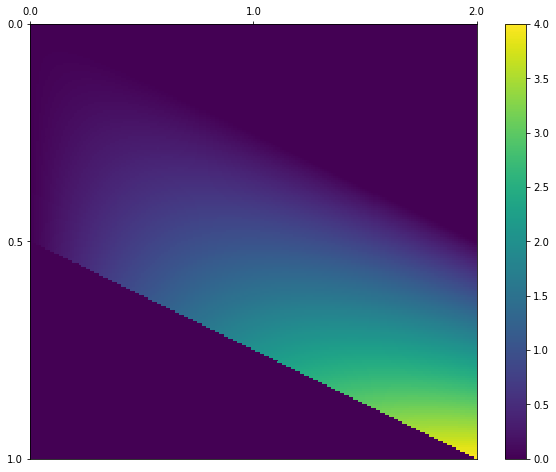

In [77]:
xs = np.linspace(x_range[0], x_range[1], 200)
ys = np.linspace(y_range[0], y_range[1], 200)
pd = np.array([[f_xy(x, y) for y in ys] for x in xs])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(pd)
ax.set_xticks(np.linspace(0, 200, 3), minor=False)
ax.set_yticks(np.linspace(0, 200, 3), minor=False)
ax.set_xticklabels(np.linspace(0, 2, 3))
ax.set_yticklabels(np.linspace(0, 1, 3))
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [78]:
# (피적분함수, [x의적분구간, y의적분구간])  >>인수 2개. p.191
# 1.0 이 나와야하는데 버전때문에 다른 숫자가 나옴
integrate.nquad(f_xy, [[-np.inf, np.inf], [-np.inf, np.inf]])[0]

1.326

과제 08/30 192~199 colab으로 해보기

# 대표적인 연속형 확률분포

## 정규분포 (세상에서 제일중요)

In [79]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

In [80]:
# check_prob : 확률의 성질 만족하는지 확인하고 기댓값과 분산 계산하는 함수
# plot_prob : 확률변수와 구간을 인수로 취하고 그 확률변수의 밀도함수와 분포함수를 그리는 함수
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x): # 기댓값
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=lambda x: x): # 분산
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def check_prob(X): # 확률변수를 인수로 취하여 그 확률변수가 확률의 성질을 만족하는지 확인하고
    x_range, f = X # 기댓값과 분산을 계산하여 반환함
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected vaue {E(X):.3f}')
    print(f'variance {V(X):.3f}')
    
def plot_prob(X, x_min, x_max): # 확률변수를 인수로 취하고 그 확률변수의 밀도함수의 분포함수를 그림
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
            label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs],
            label='F(x)', ls='--', color='gray')

    ax.legend()
    plt.show()

<정규분포>
- 통계분석에서 자주 사용되는 중요한 확률분포로 자연계에서 일어나는 수많은 현상을 표현. 가우스 분포라고도 부름
- 정규분포가 취할 수 있는 값은 실수 전체로 파라미터는 $평균(\mu)과 분산(\sigma^2)$ 두가지이다. $N(\mu,\sigma^2)$으로 표기
- 정규분포의 밀도 함수
<img src = './dataset/정규분포.jpg' STYLE='width 200px;'>

- Numpy의 numpy.exp() 함수는 밑이 자연상수 e인 지수함수(e^x)로 변환
- 자연상수(natural constant) e는 2.718281828459045… 이란 숫자입니다. 파이(π)처럼 소수점 아래에 끝이 없는 무리수
- 자연 로그(natural logarithm)의 라틴 이름은 logarithm naturali 인데요, 이를 줄여서 ln이라고 합니다. 자연로그는 자연 상수 e를 밑(base)으로 하는 로그(log)입니다.
- 자연 상수 e는 어떤 대상이 얼마 만큼 성장했는지를 알려 주는 수라면, 자연로그는 그 성장을 이루기 위해 얼마의 시간(또는 기간)이 필요한 지를 계산하는 것이라고 볼 수 있습니다.
- 자연 상수 e의 의미와 자연 상수 e와 자연 로그의 관계를 이해하면, 자연 로그 값이 왜 성장을 달성하기 위한 시간(기간)을 알려 주는 지 이유를 알 수 있는데요

In [81]:
def N(mu, sigma):
    x_range = [- np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma**2) *\
                    np.exp(-(x-mu)**2 / (2 * sigma**2))
    return x_range, f # 확률변수와 확률

In [82]:
mu, sigma = 2, 0.5
X = N(mu, sigma)

In [83]:
check_prob(X)

expected vaue 2.000
variance 0.250


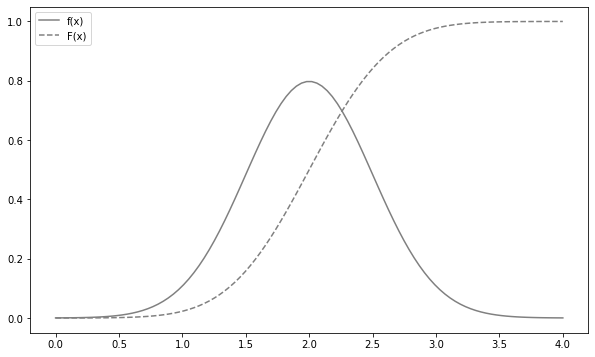

In [84]:
plot_prob(X, 0, 4)

In [85]:
# scipy.stats.norm은 가우시안 정규분포 객체를 생성하는 메서드
rv = stats.norm(2, 0.5)
rv

In [86]:
rv.mean(), rv.var() # 평균, 분산

(2.000, 0.250)

In [87]:
rv.pdf(2) # 확률밀도함수 PDF

0.798

In [88]:
rv.cdf(2) # 누적분포함수 CDF

0.500

- isf : 생존함수의 역함수(inverse survival function)

In [89]:
# 상위 30% 점(70%정도 누적)
rv.isf(0.3)

2.262

- interval : 확률이 알파가 되는 가운데 부분의 구간을 구할 수 있다.

In [90]:
# 면적 90% 구간. x축 범위로 나타남
rv.interval(0.9)

(1.178, 2.822)

In [91]:
# 바로 위랑 같은값.
# 위에 90%의 면적이라고 했으니 남은부분은 좌우 합쳐서 10%의 지분이다.
# 그러면 반 쪼갰을때 각각 5%씩이 남은부분
rv.isf(0.95), rv.isf(0.05) # 백분율

(1.178, 2.822)

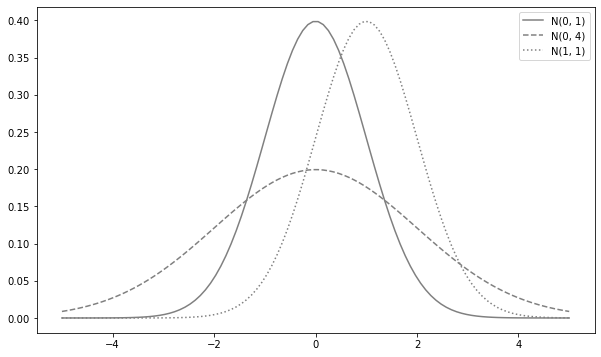

In [92]:
# p.212 정규분포
linestyles = ['-', '--', ':']

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111) # 축

xs = np.linspace(-5, 5, 100) # x축 쪼개기
params = [(0, 1), (0, 2), (1, 1)]  # 세가지 파라미터
for param, ls in zip(params, linestyles): # zip은 인자를 쌍으로 묶어줌
    mu, sigma = param   # param을 평균과 표준편차에 대입
    rv = stats.norm(mu, sigma) # 정규분포 객체 생성
    ax.plot(xs, rv.pdf(xs), # pdf 확률밀도함수
            label=f'N({mu}, {sigma**2})', ls=ls, color='gray')
    # 레이블 for문돌려서 3개. mu 0, sigma 1, mu 0, sigma 2, mu 1, sigma 1 적용
ax.legend()

plt.show()  # 파라미터가 0,1 인 가운데있는건 표준정규분포
# 0, 4는 분산이 4니깐 넓게 퍼짐
# 1, 1은 분산은 같지만 평균이 1이므로 1만큼 우측에 위치

In [93]:
stats.norm.pdf(loc=4, scale=0.8, x=4) # pdf 확률밀도함수

0.499

In [94]:
stats.norm.pdf(loc=0, scale=1, x=0) # x=0일때 y값 0.4

0.399

<img src="./dataset/PDF(확률밀도함수).png">

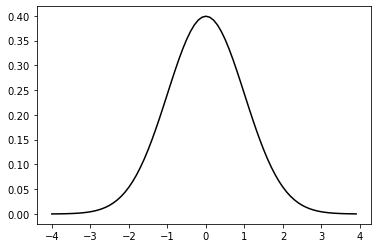

In [95]:
x_plot = np.arange(-4, 4, 0.1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot, loc=0, scale=1), color='black')

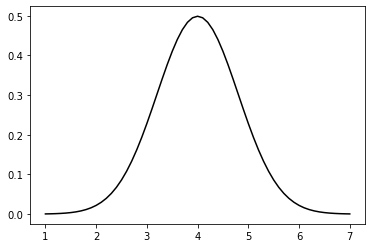

In [96]:
# x : 1 ~ 7.1, 평균 4, 표준편차 0.8인 정규분포 곡선을 출력하세요.
x_plot = np.arange(1, 7.1, 0.1) # 범위설정
plt.plot(x_plot, stats.norm.pdf(x=x_plot, loc=4, scale=0.8), color='black')

In [97]:
# 확률변수가 4일때의 확률밀도
norm_dist = stats.norm(loc=4, scale=0.8) # 위의 평균과 표준편차를 유지하고,
norm_dist.pdf(x=4) # 확률변수 x=4란 값을 여기서 줌

0.499

In [98]:
# 누적분포함수 CDF
stats.norm.cdf(loc=4, scale=0.8, x=7.1) # 위에보면 7이 최대치. x=7까지 누적하면 1

1.000

- 과제 08/30 (2)
1. 상기 누적분포함수를 그래프로 출력하세요.

2. 확률변수가 4일떄 누적분포값(확률)

3. 확률이 0.5일때 확률변수를 구하세요.

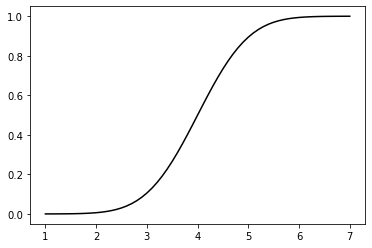

In [99]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

x_plot = np.arange(1, 7.1, 0.1) # 범위설정
plt.plot(x_plot, stats.norm.cdf(loc=4, scale=0.8,x=x_plot), color='black')

In [100]:
# 2. 확률변수가 4일 때 누적분포값(확률)
stats.norm.cdf(loc=4, scale=0.8, x=4)

0.500

In [101]:
# 3. 확률이 0.5일때 확률변수를 구하세요.

# rv = norm(loc = 0, scale = 1) #표준정규확률객체 만들기
# >>> rv.ppf(0.5) #0.5 분위수값

cum = stats.norm(loc = 4, scale = 0.8)
cum.ppf(0.5) # 보통 확률변수를 가지고 확률을 구하는데 반대로 주어진 경우에는 역함수인 ppf 사용

4.000

확률분포함수

- pmf 확률질량함수(probability mass function)
- pdf 확률밀도함수(probability density function)
- cdf 누적분포함수(cumulative distribution function)
- ppf 누적분포함수의 역함수(inverse cumulative distribution function)
- sf 생존함수(survival function) = 1 - 누적분포함수
- isf 생존함수의 역함수(inverse survival function)
- rvs 랜덤 표본 생성(random variable sampling)

Text(0.5, 1.0, '확률밀도함수와 누적분포함수')

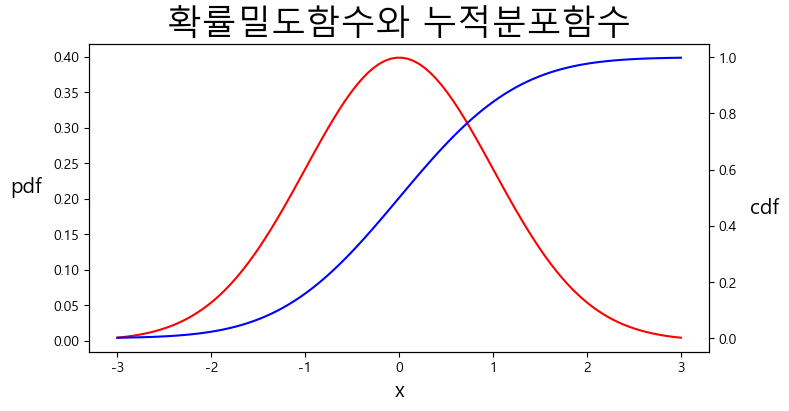

In [102]:
from matplotlib import rc
plt.style.use('default')
rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(8, 4))  
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()  # 하나 더 그리겠다는것
rv = stats.norm(0, 1)
xx = np.linspace(-3,3,100)
y1 =rv.pdf(xx)
y2 =rv.cdf(xx)
        # 플롯 사이즈 지정
ax1.plot(xx, y1, color="red")         # 선을 빨강색으로 지정하여 plot 작성  
ax2.plot(xx, y2, color='blue')
ax1.set_xlabel("x",fontsize=15)                      # x축 레이블 지정
ax1.set_ylabel("pdf",rotation=0, fontsize=15,labelpad=20) 
ax2.set_ylabel("cdf",rotation=0, fontsize=15,labelpad=20) # y축 레이블 지정
                         # 플롯에 격자 보이기
# ax1.legend(loc='center left')              # 범례 표시
# ax2.legend(loc='center right') 
plt.title('확률밀도함수와 누적분포함수',fontsize=25)

In [103]:
# 확률밀도함수pdf와 누적분포함수cdf의 y값이 다름
# 그래서 xlabel은 같아서 하나인데 y는 두개 그림

In [104]:
rv.cdf(0) # 0까지의 누적분포. 우측 눈금 0.5

0.500

In [105]:
rv.cdf(1) # cdf이므로 우측눈금 보면됨

0.841

In [106]:
# ppf : 누적분포함수(cdf)의 역함수.
rv.ppf(0.5) # 누적분포가 0.5인 x값을 출력

0.000

In [107]:
rv.ppf(0.841)

0.999

In [108]:
rv.ppf(0.95) # x값이나옴 = 확률변수

1.645

In [109]:
# 0~1까지 누적확률분포 : 누적분포 1까지의 값 - 누적분포 0까지의 값
rv.cdf(1) - rv.cdf(0)

0.341

In [110]:
# (-2 < x < 2)의 확률을 구하세요.
rv.cdf(2) - rv.cdf(-2)

0.954

- 과제 08/30 (3)
1. 상위 5% 확률의 확률변수를 구하세요.
2. 하위 5% 확률의 확률변수를 구하세요.

In [111]:
# 상위 5% 는 0.95 이상, 전체값은 1.
rv.ppf(0.95), rv.ppf(0.05)

(1.645, -1.645)

In [112]:
rv.isf(0.05), rv.isf(0.95)

(1.645, -1.645)

- 과제 08/30 (4)
1. 어느 회사에서 종업원들의 근무기간을 조사하였는데, 종업원들의 근무기간은 평균이 11년이고 표준편차가 4년인 정규분포를 따른다고 한다. 그럼 이 회사에서 14년 이상 근무한 종업원의 비율을 구하시오 

2. 어느 전구회사의 전구의 수명은 평균 800일, 표준편차 30일인 정규분포를 따른다. 전구의 수명이 760일 이하일 확률 구하시오 

3. 어느 고등학교 3학년 학생들의 수학 성적은 평균이 70점이고 분산이 64점인 정규분포를 따른다고 한다. 그럼 점수가 80점 이상이고 90점 이하일 확률을 구하시오


In [113]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# 평균 11, 표준편차 4, x= 14
company = stats.norm.cdf(loc=11, scale=4, x=14)
company # 14년차 안된사람들의 합계

0.773

In [114]:
# 14년차 이상 비율
(1 - company)*100

22.663

In [115]:
# 풀이2
company2 = stats.norm.sf(loc=11, scale=4, x=14)
company2 # sf :1 - 누적분포함수

0.227

In [116]:
# 풀이3
rv = stats.norm(11,4)
rv # 평균이 11이고 표준편차가 4인 정규분포

In [117]:
1- rv.cdf(14)

0.227

In [118]:
# 풀이4
rv.sf(14)

0.227

In [119]:
# 평균 800, 표준편차 30, x<=760

elec = stats.norm.cdf(loc=800, scale=30, x=760) # 누적밀도함수
elec*100

9.121

In [120]:
# 평균 70, 분산 64, 80 <= x <= 90

In [121]:
score1 = stats.norm.cdf(loc=70, scale=np.sqrt(64), x=90)
score2 = stats.norm.cdf(loc=70, scale=np.sqrt(64), x=80)
(score1 - score2)*100

9.944

In [122]:
# # 확률변수가 4일때의 확률밀도
# norm_dist = stats.norm(loc=4, scale=0.8) # 위의 평균과 표준편차를 유지하고,
# norm_dist.pdf(x=4) # 확률변수 x=4란 값을 여기서 줌

<img src="./dataset/정규분포 정리.jpg">

##  지수분포

지수분포
- 어떤 사건이 발생하는 간격이 따르는 분포이며 확률변수가 취할 수 있는 값은 0이상의 실수
- 지수분포의 파라미터는 $\lambda$로 양의 실수이며 지수분포를 Ex($\lambda$)로 표기한다.
- Ex($\lambda$)는 단위시간당 평균 $\lambda$번 발생하는 사건의 발생 간격을 따르는 확률분포이다.
- 지수분포의 밀도함수 :

$$f(x) = {\lambda}e^{{-\lambda}x} (x \ge 0)$$

                                         0        (otherwise)


In [123]:
# p.215 지수분포 numpy로 구하기
import numpy as np

def Ex(lam):
    x_range = [0, np.inf]  # 범위지정, 0이상 무한대
    def f(x):
        if x >= 0:
            return lam * np.exp(-lam*x) # e는 np.exp로 표기
        else:
            return 0
    return x_range, f
# 지수함수에서는 파라미터가 람다 하나.

# 지수분포는 포아송 분포와 관련이 강함

# 단위시간당 사건이 발생하는 횟수 : Poi(lam) 포아송 분포. 횟수니깐 이산형.lam
# 지수함수 : 사건의 발생 간격이 따르는 것.Ex(lam). 연속형.Ex(lam)
# >> 다음 사건이 발생할 떄까지의 대기시간.
# https://soohee410.github.io/exponential_dist

In [124]:
lam = 2
X = Ex(lam)

In [125]:
check_prob(X)

expected vaue 0.500
variance 0.250


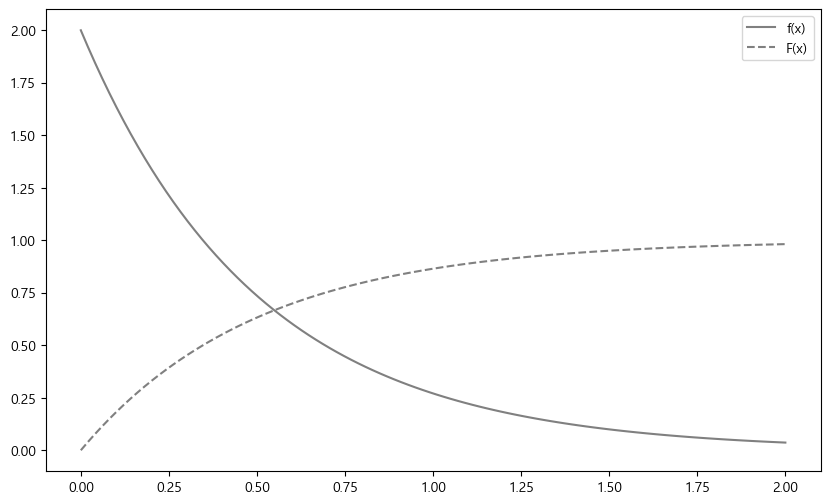

In [126]:
plot_prob(X, 0, 2)
# f(x) 확률밀도함수
# F(x) 누적분포함수

- 과제 08/31 (1)

상기 지수분포에서 lambda를 1,2,3으로 변환시켰을 때 그래프의 변화 모습을 출력하고 의미를 설명하세요.

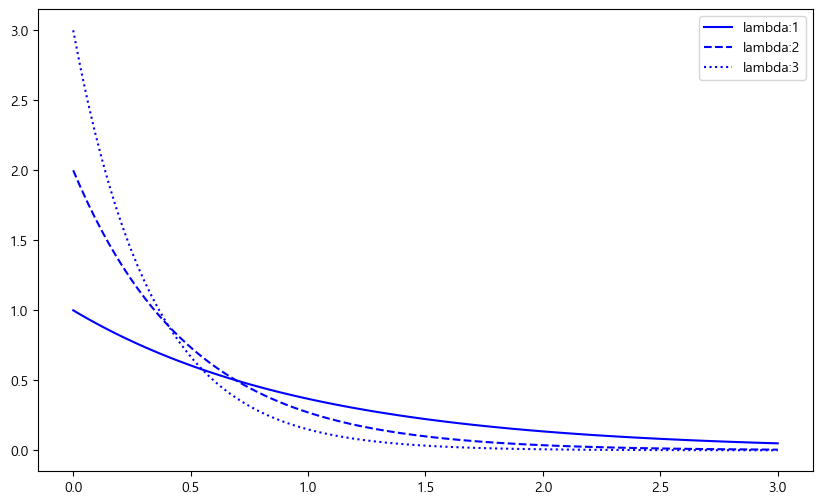

In [127]:
# 많이 활용되는 코드
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 3, 100)
for lam, ls in zip([1,2,3], linestyles):
    rv = stats.expon(scale=1/lam)
    ax.plot(xs, rv.pdf(xs),
           label=f'lambda:{lam}', ls=ls, color='blue')
ax.legend()

plt.show()    

- 지수분포의 기댓값과 분산

X ~ Ex(lam) 일 때,

E(X) = 1/lam

V(X) = 1/(lam**2)

## 카이제곱분포

- 카이제곱분포, t분포, F분포는 '어떠한 사건이 따른다'가 아닌
- '어떠한 형태를 하고있다'라고 함. > 추정과 검정에 사용하는 특수한 확률분포
- 분산의 구간 추정

카이제곱분포
- 좌우비대칭으로 왼쪽으로 치우치고 오른쪽으로 넓어진다.
- 자유도가 커지면 좌우대칭에 가까워진다.
- 자유도의 값 가까이에 분포의 정점이 있다.

- 카이제곱분포는 독립된 확률분포가 표준정규분포를 따를때, 그 제곱합의 확률분포를 자유도가 n인 카이제곱분포라고한다.

Y = 1^2 + 2^2 + ... + n^2

In [128]:
n = 10 # 자유도
rv = stats.norm() # 디폴트 주면 표준정규분포
sample_size = int(1e6) # 100만
# 표준정규분포에서 표본크기 100만으로 무작위 추출
Zs_sample = rv.rvs((n, sample_size))
# axis=0에서 총합을 구하고, 표준정규분포의 제곱합 표본데이터 구함
chi2_sample = np.sum(Zs_sample**2, axis=0)

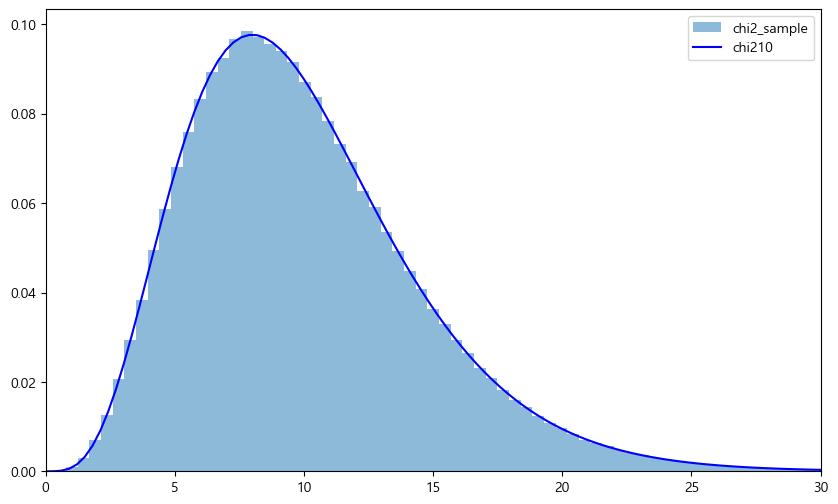

In [133]:
# 카이제곱분포와 표준정규분포의 관계
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n)
xs = np.linspace(0, 30, 100)
ax.hist(chi2_sample, bins=100, density=True,
       alpha=0.5, label='chi2_sample')
ax.plot(xs, rv_true.pdf(xs), label=f'chi2{n}', color='blue')

ax.legend()
ax.set_xlim(0,30)
plt.show()

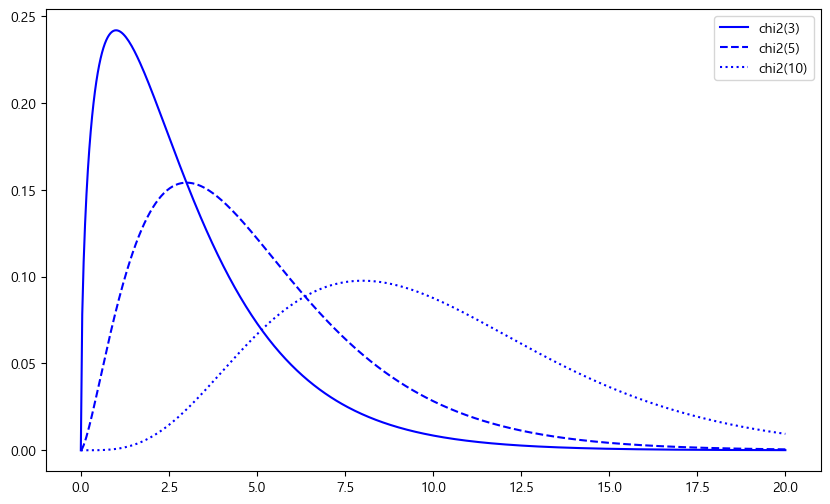

In [134]:
# p. 222
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 20, 500)
for n, ls in zip([3,5,10], linestyles):
    rv = stats.chi2(n)
    ax.plot(xs, rv.pdf(xs),
           label=f'chi2({n})', ls=ls, color='blue')
    
ax.legend()
plt.show()
# 자유도가 커지면 정규분포에 가까워짐

In [135]:
rv = stats.chi2(5)
rv.isf(0.05) # 생존함수의 역함수. 상위 5%

11.070

## t 분포

 t분포
- 정규분포에서 모평균의 구간추정 등에 사용되는 확률분포
- 확률변수 Z, Y는 서로 독립이고 Z는 표준정규분포 N(0,1)을 Y는 자유도가 n인 카이제곱분포 $\chi^2(n)$을 각각 따를 때 t = ${Z} \over{\sqrt{{Y}\over{n}}}$ 의 확률분포를 자유도가 n인 t분포라고 한다.
- t분포의 의미
  * 모분산을 모르는 상황에서도 표본평균의 분포에 대하여 애기할 수 있다.
  * t분포를 만들 때 표본에서 계산한 표준오차로 표본평균을 표준화함
  * 표본에서 계산한 표준오차로 표본평균을 표준화했을 경우의 결과가 t분포를 따른다는 사실을 이용하면 얻어낸 표본평균에 관한 불확실성을 짐작할 수 있다.
- t분포의 특성
  * t분포는 모집단이 정규분포이더라도 분산 $\sigma^2$이 알려져 있지 않고 표본의 수가 적은 경우에 평균 $\mu$에 대한 신뢰구간 추정 및 가설검정에 아주 유용하게 쓰이는 분포이다.
  * t분포는 표준정규분포처럼 0을 중심으로 종형의 모습을 가진 대칭 분포이다.
  * t분포는 꼬리는 표준정규분포 보다 두껍다(fat tail)
  * t분포는 자유도 n에 따라 모습이 변하는데 자유도 n이 커짐에 따라 표준정규분포 N(0,1)에 수렴한다. 통상 모집단의 분산이 알려져 있지 않은 경우, 표분분포를 결정할 때 표본의 크기가 30 이하이면 t분포를, 그 크기가 30 이상이면 표준정규분포를 이용

In [136]:
# p.225
n = 10
rv1 = stats.norm()
rv2 = stats.chi2(n)

sample_size = int(1e6)
Z_sample = rv1.rvs(sample_size) # rvs : 정규분포에서 난수생성
chi2_sample = rv2.rvs(sample_size)

t_sample = Z_sample / np.sqrt(chi2_sample/n)

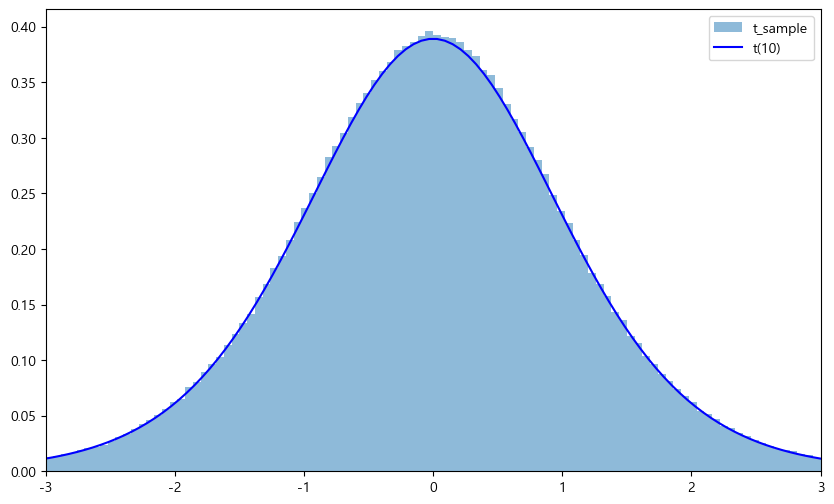

In [137]:
# t분포와 다른 분포의 관예. p.225~226
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.t(n)
xs = np.linspace(-3, 3, 100)
ax.hist(t_sample, bins=100, range=(-3, 3),
       density=True, alpha=0.5, label='t_sample')
ax.plot(xs, rv.pdf(xs), label=f't({n})', color='blue')

ax.legend()
ax.set_xlim(-3, 3)
plt.show()

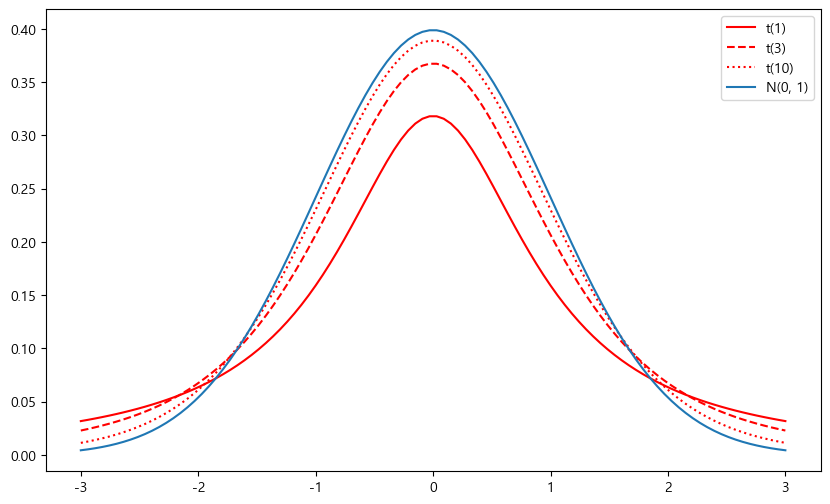

In [138]:
# p.226 다양한 t분포
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-3, 3, 100)
for n, ls in zip([1, 3, 10], linestyles):
    rv = stats.t(n)
    ax.plot(xs, rv.pdf(xs),
            label=f't({n})', ls=ls, color='red')
rv = stats.norm()
ax.plot(xs, rv.pdf(xs), label='N(0, 1)')
    
ax.legend()
plt.show()

In [139]:
rv = stats.t(5)
rv.isf(0.05)

2.015

## F 분포

- 확률변수 $Y_1, Y_2는 서로 독립이고 각각 Y_1$ ~ ${\chi}^2(n_1), Y_2$ ~ ${{\chi}^2(n_2)}$를 따를 때,
F = ${Y_1/n_1}\over{Y_2/n_2} $의 확률분포를 자유도 $n_1,n_2$인 F분포 F$(n_1,n_2)$라고 한다.
- 좌우 비대칭으로 왼쪽으로 치우치고 오른쪽으로 넓어지는 분포이다.
- F분포가 취할 수 있는 값은 0 이상인 실수이며 분포의 정점은 1에 가깝다.

- F 분포는 분산분석에서 사용됨

In [140]:
# p.230
n1 = 5
n2 = 10
rv1 = stats.chi2(n1)
rv2 = stats.chi2(n2)

sample_size = int(1e6)
sample1 = rv1.rvs(sample_size)
sample2 = rv2.rvs(sample_size)

f_sample = (sample1/n1) / (sample2/n2)

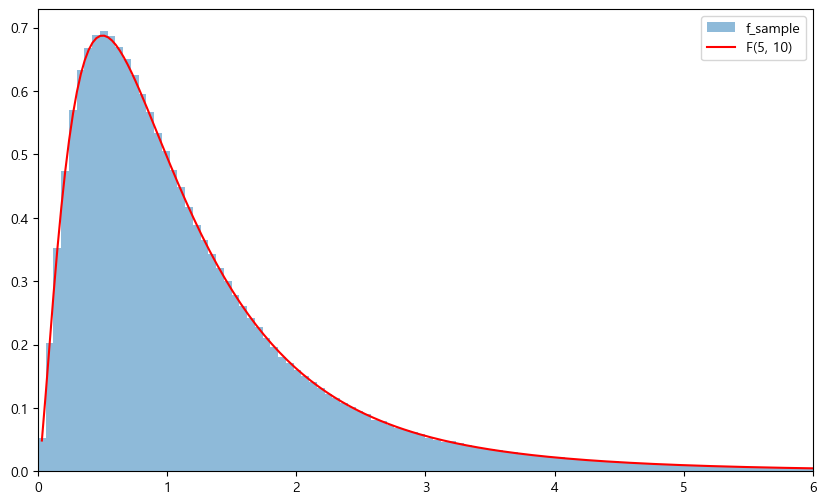

In [141]:
# F 분포와 카이제곱분포의 관계. p.231
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.f(n1,n2)
xs = np.linspace(0, 6, 200)[1:]
ax.hist(f_sample, bins=100, range=(0,6), density=True,
        alpha=0.5, label= 'f_sample')
ax.plot(xs, rv.pdf(xs), label=f'F({n1}, {n2})', color='red')

ax.legend()
ax.set_xlim(0,6)
plt.show()

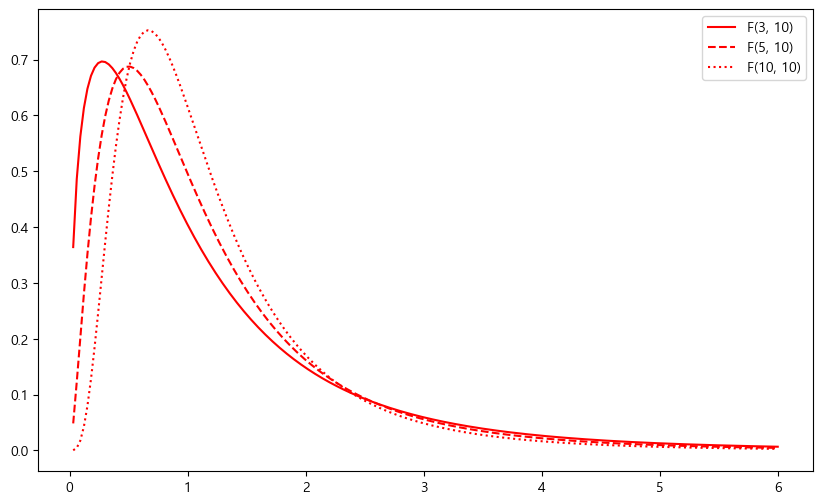

In [142]:
# p.232 다양한 F분포
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 6, 200)[1:]
for n1, ls in zip([3,5,10], linestyles):
    rv = stats.f(n1, 10)
    ax.plot(xs, rv.pdf(xs),
           label=f'F({n1}, 10)', ls=ls, color='red')
    
ax.legend()
plt.show()

# 독립동일분포

##  독립성

독립동일분포
- 확률변수가 서로 독립이라는 것은 확률변수가 다른 확률변수에 영향을 끼치지 않는다는 의미이다.
- 통계분석에서 취급하는 데이터 중 상당수가 독립이면서 다차원인 확률변수의 실현값으로 간주될 수 있다.
- 서로 독립이고 각각 동일한 확률분포를 따르는 다차원 확률변수를 독립동일분포라 한다.

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)
%precision 3
%matplotlib inline

In [144]:
linestyles = ['-', '--', ':', '-.']

def E(XY, g): # 기댓값
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

def Cov(XY): # 공분산
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

독립성의 정의
- 2개 이상의 확률변수가 서로 영향을 끼치지 않으며 관계가 없음을 나타내는 개념
- 2차원 확률변수 (X,Y)의 경우 다음과 같은 관계가 성립할 때 X,Y는 독립이라고 함.  
$f_{X,Y}(x,y) = f_X(x)f_Y(y)$
- 확률변수가 독립일 때 결합확률은 주변확률의 곱으로 작성할 수 있다.
- 일반화 : $f_{X_1,X_2,...,X_n}(x_1,x_2,..x_n) = f_{X_1}(x_1)f_{X_2}(x_2)···f_{X_n}(x_n)$  
※ 함수 f가 이산형이면 확률함수, 연속형이면 밀도함수를 나타냄

독립성과 무상관성
- 공분산이나 상관계수가 0일 때 무상관이라 하고 두 확률변수 사이에는 상관성, 즉 선형 관계가 없음을 나타냄
- 독립성도 무상관성도 두 확률변수가 서로 관계가 없다는 것을 나타내는 성질이다.
 * 무상관성보다 독립성이 더 강한 개념
 * 2개의 확률변수 X와 Y가 독립일 때 X와 Y는 무상관이 되지만 X와 Y가 무상관일 때 X와 Y가 반드시 독립인 것은 아님.
 
 무상관⊂독립

In [145]:
# p.238
x_set = np.array([1,2,3,4,5,6]) # 불공정한 주사위.
y_set = np.array([1,2,3,4,5,6])

def f_XY(x, y):
    if x in x_set and y in y_set:
        return x * y / 441
    else:
        return 0
    
XY = [x_set, y_set, f_XY]

In [146]:
# 2차원 확률변수 X와 Y는 독립
# 공분산이 0이므로 무상관
Cov(XY)

-0.000

In [147]:
# 무상관인 2개의 확률변수 고려
x_set = np.array([0,1])
y_set = np.array([-1,0,1])

def f_XY(x, y):
    if (x, y) in [(0,0), (1,1), (1,-1)]:
        return 1/3
    else :
        return 0

XY = [x_set, y_set, f_XY]

In [148]:
# 확률변수 X와 Y의 공분산
Cov(XY)

0.000

In [149]:
f_X(0) * f_Y(0), f_XY(0,0) # X와 Y가 독립이 아님.

(0.111, 0.333)

## 합의 분포

합의 분포
- 서로 독립이고 동일한 확률분포을 따르는 확률변수 $X_1,X_2,···,X_n의 합 \sum_{i=1}^n X_i = X_1 + X_2 + ···+ X_n$이 따르는 확률분포를 의미
- 합의 분포를 이해하면 확률변수의 합을 n으로 나눈 표본평균의 분포도 쉽게 이해할 수 있음
- 확률변수 합의 기댓값 : $E(X_1 + X_2 + ··· + X_n) = E(X_1) + E(X_2) + ··· E(X_n)$ 이 성립
- 확률변수 합의 공식 : $X_1, X_2, ··· ,X_n이 서로 독립이면  V(X_1 + X_2 + ··· + X_n) = V(X_1) + V(X_2) + ··· V(X_n)$이 성립  
결국 합의 분포 분산도 각 확률변수에 대한 분산의 합으로 계산할 수 있다.

### 정규분포의 합의 분포

- 재생성(p.243)이 있음

In [150]:
# 서로 독립인 X~N(1,2), Y~N(2,3)이 있을 때, 확률변수 X + Y의 분포는 N(3,5)를 따름
rv1 = stats.norm(1, np.sqrt(2))
rv2 = stats.norm(2, np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
print(X_sample, '\n')
print(Y_sample, '\n')
sum_sample = X_sample + Y_sample
print('평균:', np.mean(X_sample), np.mean(Y_sample),'\n')
print('분산:', np.var(X_sample), np.var(Y_sample),'\n')
print('합의 평균, 분산:', np.mean(sum_sample), np.var(sum_sample))

[ 3.495  1.566  2.384 ... -0.128  2.237  2.94 ] 

[ 2.891  3.928  3.169 ... -1.152  1.427  1.326] 

평균: 1.0021384981105663 2.0005273223788174 

분산: 1.999685316445821 2.993320616863069 

합의 평균, 분산: 3.0026658204893835 4.9960524321119335


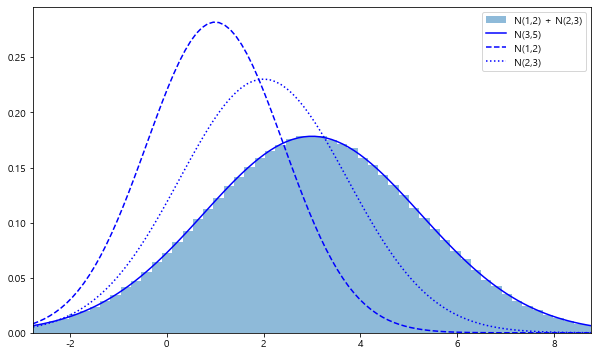

In [151]:
# p.244 정규분포의 합
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)

ax.hist(sum_sample, bins=100, density=True,
       alpha=0.5, label='N(1,2) + N(2,3)')
ax.plot(xs, rv.pdf(xs), label='N(3,5)', color='blue')
ax.plot(xs, rv1.pdf(xs), label='N(1,2)', ls='--', color='blue')
ax.plot(xs, rv2.pdf(xs), label='N(2,3)', ls=':', color='blue')

ax.legend()
ax.set_xlim(rv.isf(0.995), rv.isf(0.005))
plt.show() # 히스토그램과 밀도함수가 일치함. X+Y~N(3,5)

### 포아송 분포의 합의 분포

- 재생성(p.243)이 있음

In [152]:
# 포아송분포의 파라미터가 커질수록 정규분포에 가까워짐. 이산형 확률분포

In [153]:
# 확률변수 X~Poi(3), Y~Poi(4). X + Y = 7 ?
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample) # X + Y ~ Poi(7)

(6.999, 6.990)

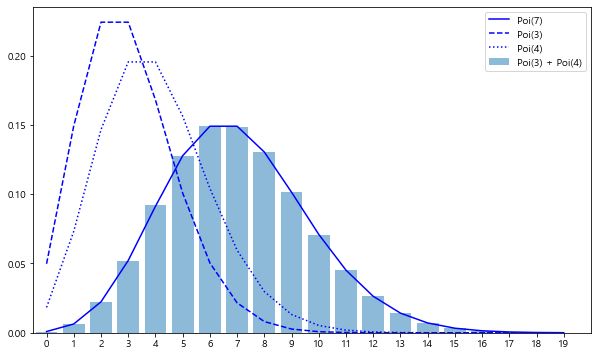

In [154]:
# p.247
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.poisson(7)
xs = np.arange(20)
hist, _ = np.histogram(sum_sample, bins=20, range=(0,20), normed=True)

ax.bar(xs, hist, alpha=0.5, label='Poi(3) + Poi(4)')
ax.plot(xs, rv.pmf(xs), label='Poi(7)', color='blue')
ax.plot(xs, rv1.pmf(xs), label='Poi(3)', ls='--', color='blue')
ax.plot(xs, rv2.pmf(xs), label='Poi(4)', ls=':', color='blue')

ax.legend()
ax.set_xlim(-0.5, 20)
ax.set_xticks(np.arange(20))
plt.show()

### 베르누이 분포의 합의 분포

베르누이 분포
- E(X) = p* 시행횟수(n)
- V(X) = p*(1-p)* 시행횟수(n)
- 베르누이 분포에는 재생성이 없음
- 베르누이 분포의 합은 이항분포가 되는 성질이 있음

In [155]:
# p.248
p = 0.3
rv = stats.bernoulli(p)

sample_size = int(1e6)
Xs_sample = rv.rvs((10, sample_size))
sum_sample = np.sum(Xs_sample, axis=0)

np.mean(sum_sample), np.var(sum_sample)

(2.999, 2.095)

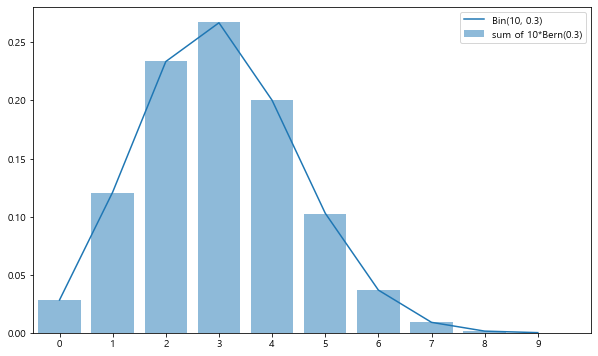

In [156]:
# p.249 베르누이 분포의 합
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.binom(10,p)
xs = np.arange(10)
hist, _ = np.histogram(sum_sample, bins=10, range=(0,10), normed=True)
ax.bar(xs, hist, alpha=0.5, label='sum of 10*Bern(0.3)')
ax.plot(xs, rv.pmf(xs), label='Bin(10, 0.3)')

ax.legend()
ax.set_xlim(-0.5, 10)
ax.set_xticks(np.arange(10))
plt.show()

## 표본평균의 분포

표본평균의 분포
- 표본평균의 분포란 서로 독립이고 동일한 확률분포를 따르는 확률변수 $X_1, X_2, ...,X_n$의 표본평균이 따르는 분포
- 이 분포는 중심극한정리나 대수의 법칙 등 추측통계에서 중요한 성질을 담고 있기 때문에 유의해야 함
- 표본평균의 기댓값과 분산  
$E(\bar{X}) = \mu$  
$V(\bar{X}) = {\sigma}^2 / n$

### 정규분포의 표본평균 분포

In [157]:
# p.252
mean = 1
var = 2
rv = stats.norm(mean, np.sqrt(var))

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(1.000, 0.199)

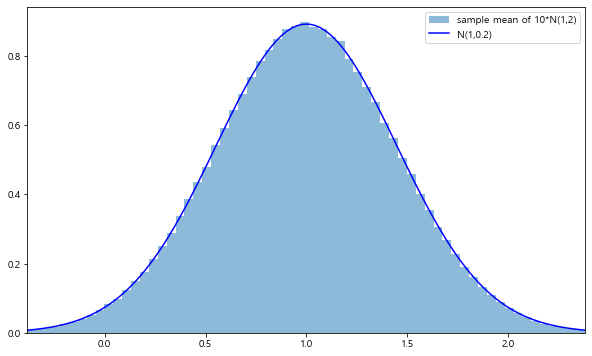

In [158]:
# p.253 정규분포의 표본평균 분포는 정규분포..
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv_true = stats.norm(mean, np.sqrt(var/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)
ax.hist(sample_mean, bins=100, density=True,
       alpha=0.5, label='sample mean of 10*N(1,2)')
ax.plot(xs, rv_true.pdf(xs), label='N(1,0.2)', color='blue')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001)) # 생존함수의 역함수
plt.show()

- 표본평균의 분포 = 평균은 뮤, 시그마^2/n 을 따름

### 포아송 분포의 표본평균 분포

In [159]:
# p.254 n = 10 X~~ ~Poi(3) . 기댓값3, 분산 3/10
l = 3
rv = stats.poisson(l)

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(2.999, 0.300)

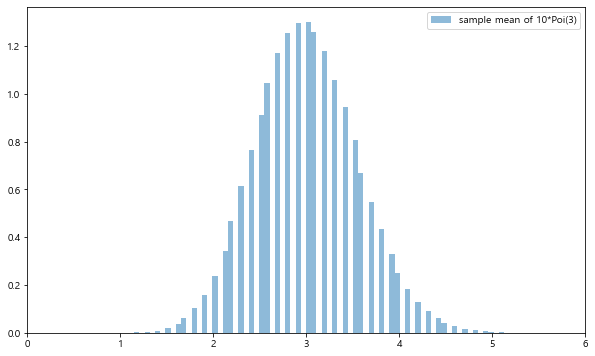

In [160]:
# p.255 포아송 분포의 표본평균
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
       alpha=0.5, label='sample mean of 10*Poi(3)')

ax.legend()
ax.set_xlim(0, 6)
plt.show()

### 중심극한정리

중심극한정리
- 확률변수 $X_1,X_2,...Xn$이 서로 독립이고 기댓값이 $\mu, 분산이 {\sigma}^2$인 확률분포 F를 따를 때 n이 커짐에 따라 표본평균 $\bar{X}의 분포는 정규분포 N(\mu,{\sigma}^2/n)$에 가까워진다.

In [161]:
# p.257
l = 3
rv = stats.poisson(l)

n = 10000
sample_size = 10000
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

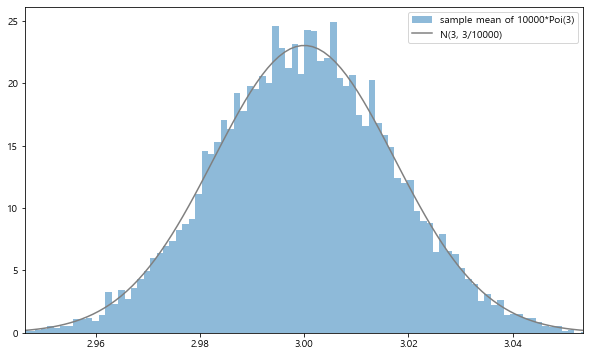

In [169]:
# 중심극한정리. 확률변수의 개수가 늘어나면 표본평균의 분포는 정규분포에 가까워짐
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10000*Poi(3)')
ax.plot(xs, rv_true.pdf(xs), label='N(3, 3/10000)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

### 대수의 법칙

대수의 법칙
- 확률변수 $X_1,X_2,...,X_n$이 서로 독립이고 평균이 $\mu, 분산이 \sigma^2$일 것 같은 확률분포를 따를 때 n이 커짐에 따라 표본평균은 $\mu$에 수렴한다.

In [163]:
# p.259  주사위가 6이 나오는지? : Bern(1/6)
# 표본크기가 커지면 표본평균은 1/6에 수렴
p = 1/6
rv = stats.bernoulli(p)

n = int(1e5)
sample = rv.rvs((n,4))
space = np.linspace(100, n, 50).astype(int)
plot_list = np.array([np.mean(sample[:sp], axis=0) for sp in space]).T
# .T : 배열을 전치시킴

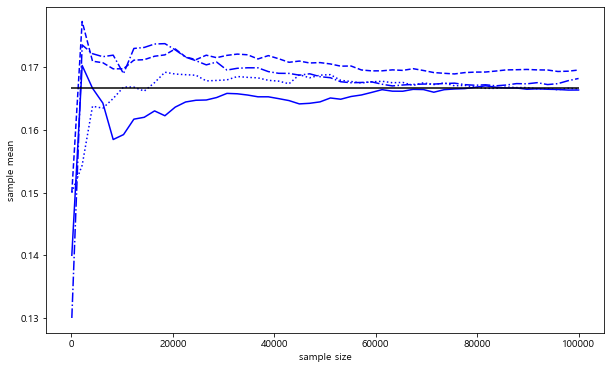

In [164]:
# 대수의 법칙
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

for pl, ls in zip(plot_list, linestyles):
    ax.plot(space, pl, ls=ls, color='blue')

ax.hlines(p, -1, n, 'k')
ax.set_xlabel('sample size')
ax.set_ylabel('sample mean')

plt.show() # 표본이 커질수록 1/6(16.66)에 수렴함.

- 과제 09/01 (3)

중심극한정리와 대수의 법칙사례를 들어 설명하세요.

In [165]:
# 대수의법칙
li = (a, b, c)
# li의 모평균은 (a+b+c)/3

# 표본평균 구하기. 표본의 크기는 2
q1 = (a+b)/2 # 표본 1 = a, b, 표본평균 q1
q2 = (b+c)/2 # 표본 2 = b, c
q3 = (c+a)/2 # 표본 3 = c, a

(q1+q2+q3)/3 # 표본평균들의 평균
 = (a,b,c)/3
    
>> 이것은 모평균과 같은 수치다
표본을 랜덤으로 추출하는 행위가 반복되면 표본평균의 평균이 나오게 되고, 결국 모평균을 따라가게 된다.

IndentationError: unexpected indent (2969301251.py, line 11)